# Large JWST PSF Calculations Using in-flight Simulations

One of the most noticeable and unique signatures of JWST images are its PSF's eight diffraction spikes. In some cases, these diffraction spikes can extend across the entire detector field of view (FOV), therefore, it is important to accurately model the PSF far from its core.


For large field of view calculations (> 500 lambda/D ~ 30 arcsec for 2 microns), the default size of the JWST pupil used by WebbPSF (1024 pixels across) will result in numerical artifacts from Fourier aliasing and the implicit repetition of the pupil entrance aperture in the discrete Fourier transform. One way to mitigate these artifacts is to increase the pixel sampling of the JWST pupil model used in the calculation. 

This notebook demonstrates how to calculate JWST PSFs, with measured wavefront, at large radii without Fourier aliasing. 


In [1]:
import webbpsf
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

## Example of Fourier aliasing: generating PSFs in a large field of view

In this example we are going to generate a NIRCam PSF in a large field of view where we expect to see the effects of Fourier aliasing.

iterating query, tdelta=3.0

MAST OPD query around UTC: 2024-08-01T00:00:00.000
                        MJD: 60523.0

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2024073102-NRCA3_FP1-1.fits
	Date (MJD):	 60521.8394
	Delta time:	 -1.1606 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/O2024080501-NRCA3_FP1-1.fits
	Date (MJD):	 60525.7541
	Delta time:	 2.7541 days
User requested choosing OPD time closest in time to 2024-08-01T00:00:00.000, which is R2024073102-NRCA3_FP1-1.fits, delta time -1.161 days
Importing and format-converting OPD from /Users/melendez/WFSC_Flight/webbpsf-data/MAST_JWST_WSS_OPDs/R2024073102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point


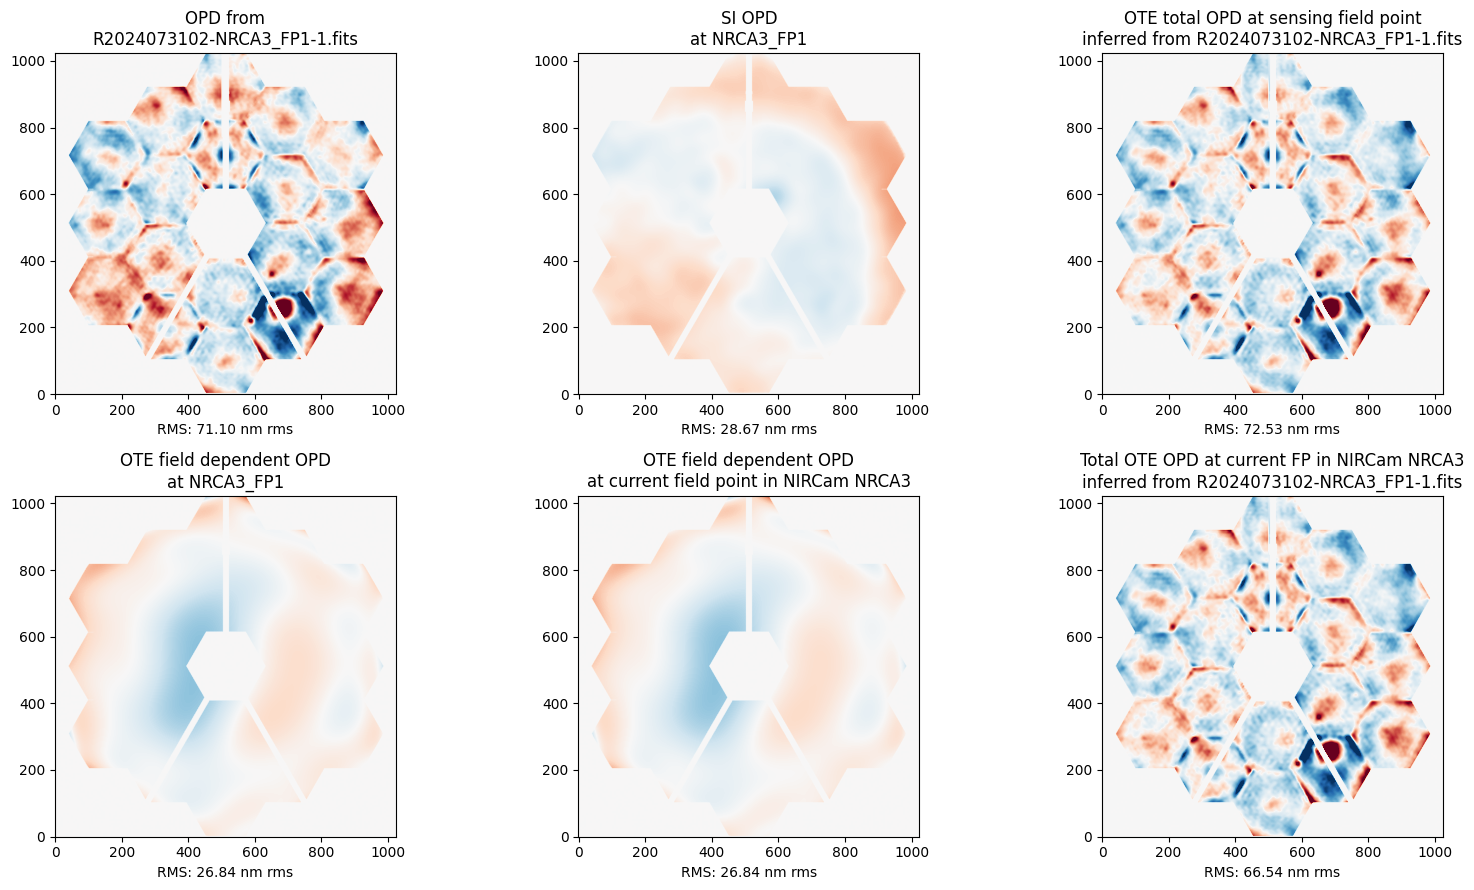

In [2]:
nrc = webbpsf.NIRCam()
nrc.detector = 'NRCA3'
nrc.filter='F070W'
nrc.load_wss_opd_by_date('2024-08-01T00:00:00', plot=True)

After the instrumental setup we can proceed with the PSF simulation for a large FOV. Note that WebbPSF will alert the user that the current simulation will be affected by aliasing artifacts. 

In [3]:
single_webbpsf = nrc.calc_psf(fov_pixels = 1024)

/Users/melendez/anaconda3/envs/py311/lib/python3.11/site-packages/poppy/instrument.py:666: UserWarning: For wavelength 0.612 microns, a FOV of 32.118 * 32.118 arcsec exceeds the maximum  spatial frequency well sampled by the input pupil. Your computed PSF will suffer from aliasing for angles beyond 9.790 arcsec radius.
  warnings.warn((
/Users/melendez/anaconda3/envs/py311/lib/python3.11/site-packages/poppy/instrument.py:666: UserWarning: For wavelength 0.621 microns, a FOV of 32.118 * 32.118 arcsec exceeds the maximum  spatial frequency well sampled by the input pupil. Your computed PSF will suffer from aliasing for angles beyond 9.926 arcsec radius.
  warnings.warn((
/Users/melendez/anaconda3/envs/py311/lib/python3.11/site-packages/poppy/instrument.py:666: UserWarning: For wavelength 0.629 microns, a FOV of 32.118 * 32.118 arcsec exceeds the maximum  spatial frequency well sampled by the input pupil. Your computed PSF will suffer from aliasing for angles beyond 10.061 arcsec radius.


We can display the result of our simulated PSF with a good stretching in order to highlight the numerical artifacts. 

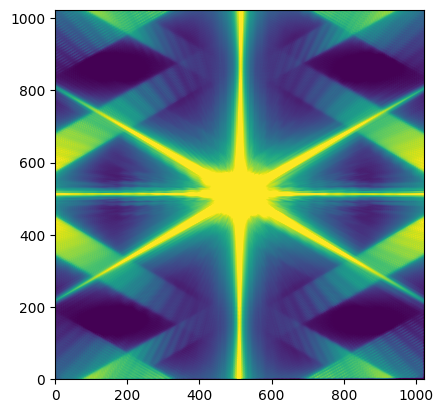

In [17]:
norm = simple_norm(single_webbpsf['DET_DIST'].data, 'log', percent=91.1)
plt.imshow(single_webbpsf['DET_DIST'].data, origin = 'lower', norm = norm)

From the image above it is clear the effects of the repetition of the pupil entrance aperture in the discrete Fourier transform. 

## Generating PSFs in a large field of view: large JWST pupil 

In this example we are going to simulate the same PSF as before but using a 4x larger JWST pupil in terms of the number of pixels. As part of the required data files for WebbPSF ([webbpsf-data](https://stsci.box.com/shared/static/qxpiaxsjwo15ml6m4pkhtk36c9jgj70k.gz)), the user has access to four different sizes:
- jwst_pupil_RevW_npix1024.fits.gz (default)
- jwst_pupil_RevW_npix2048.fits.gz
- jwst_pupil_RevW_npix4096.fits.gz
- jwst_pupil_RevW_npix16384.fits.gz

In each case, npix refers to the number of pixels used to sample across the same pupil side length (~ 6.6 meters). 

To perform a large PSF simulation we need to provide the name of one of the larger size JWST pupil files via the `pupil` attribute of the instrument. 

Then, as before, we use the function `load_wss_opd_by_date` or, if you know the appropriate OPD, `load_wss_opd`. These functions will take the size of the user-specified JWST pupil and scaled the observed wavefront measurement (OPD) accordingly.

iterating query, tdelta=3.0

MAST OPD query around UTC: 2024-08-01T00:00:00.000
                        MJD: 60523.0

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2024073102-NRCA3_FP1-1.fits
	Date (MJD):	 60521.8394
	Delta time:	 -1.1606 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/O2024080501-NRCA3_FP1-1.fits
	Date (MJD):	 60525.7541
	Delta time:	 2.7541 days
User requested choosing OPD time closest in time to 2024-08-01T00:00:00.000, which is R2024073102-NRCA3_FP1-1.fits, delta time -1.161 days
The size of the JWST pupil is different than nominal (1024px), jwst_pupil_RevW_npix4096.fits.gz. The OPD will be scaled accordingly
Importing and format-converting OPD from /Users/melendez/WFSC_Flight/webbpsf-data/MAST_JWST_WSS_OPDs/R2024073102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point


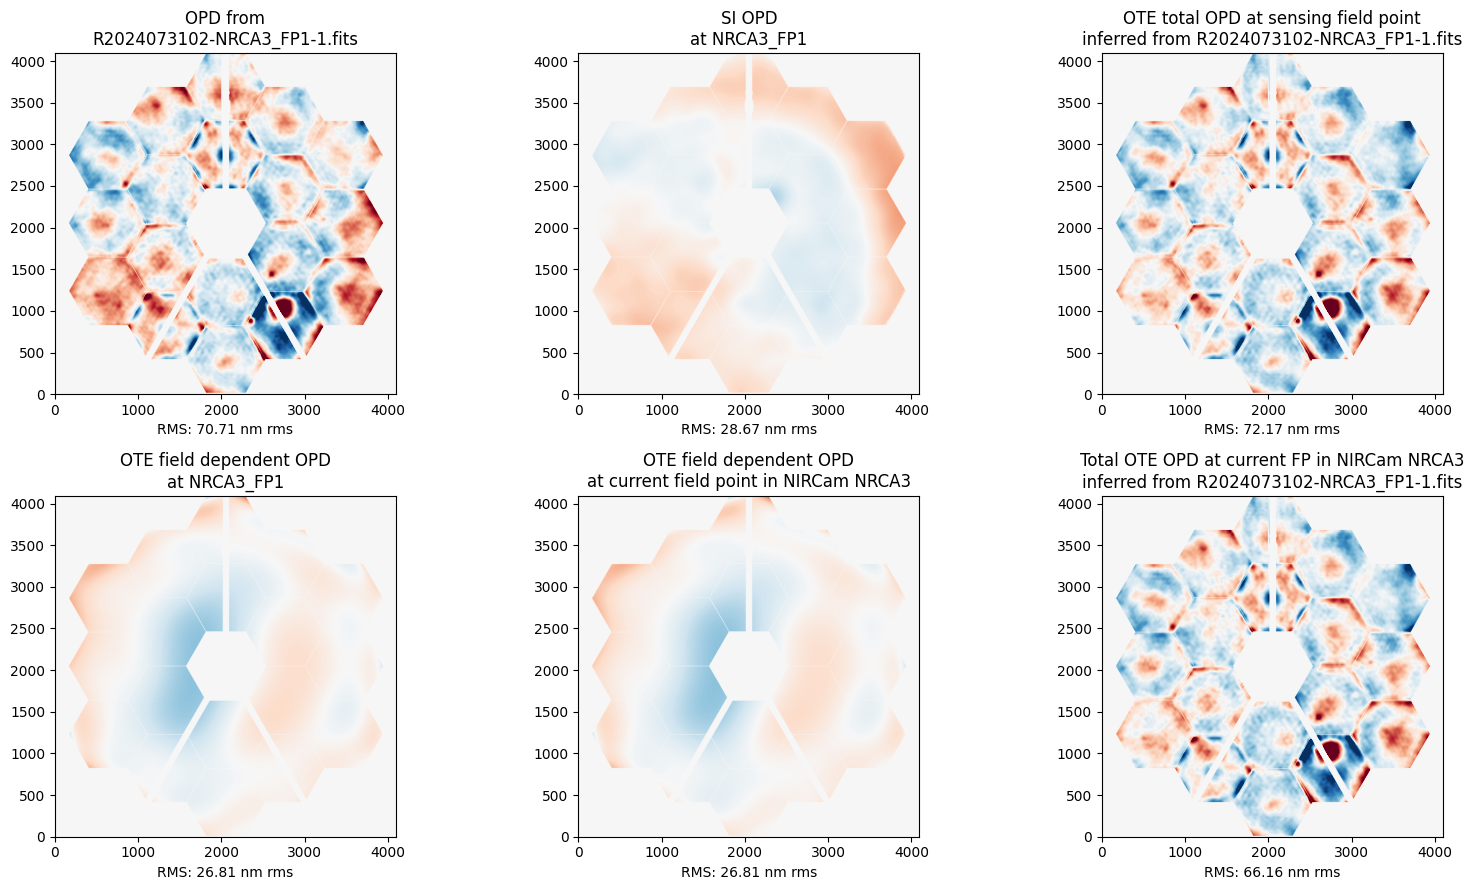

In [6]:
nrc = webbpsf.NIRCam()
nrc.detector = 'NRCA3'
nrc.filter='F070W'

nrc.pupil = 'jwst_pupil_RevW_npix4096.fits.gz' # we set the JWST pupil with the name of the larger pupil available in webbpsf-data

nrc.load_wss_opd_by_date('2024-08-01T00:00:00', plot=True)   # In the resulting plots, the larger pixel count is shown in the axes labels

As before, after doing the setup of the instrument, including the larger JWST pupil and corresponding OPD, we can proceed with the PSF calculation.


<div class="alert alert-block alert-info">
Calculations using a JWST pupil larger than the default size can be computationally demanding both in processor time and memory. Therefore, it is recommended to always use the smallest pupil size that can sufficiently reduce the effects of aliasing in your particular simulation.  As a general rule, to obtain an alias-free PSF calculation at a radius of $N~\lambda/D$, you want to have at least $2N$ pixels in the pupil model. 
</div>

Let us do the simulation and see how it compares with the previous computation

In [ ]:
single_webbpsf_larger_pupil = nrc.calc_psf(fov_pixels = 1024)

Note that there are no more warnings about aliasing in our simulation. Finally, 

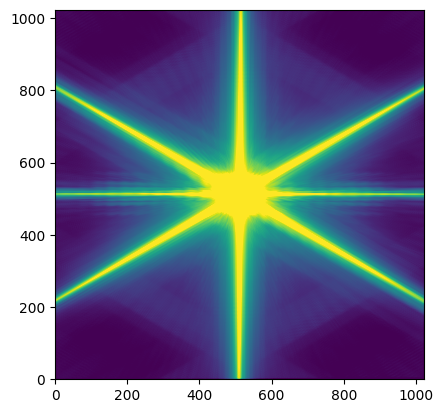

In [20]:
norm = simple_norm(single_webbpsf_larger_pupil['DET_DIST'].data, 'log', percent=91.1)
plt.imshow(single_webbpsf_larger_pupil['DET_DIST'].data, origin = 'lower', norm = norm)

As expected, our calculations with a larger JWST entrance pupil were able to remove the strong aliasing features from our previous simulation. The different sizes of JWST pupil available in WebbPSF data files should be sufficient to deal with the vast majority of cases that involve the investigation and characterization of diffraction spikes at large radii.